In [1]:
#Initial Model
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import mean_squared_error

In [2]:
#Load the Data
df = pd.read_csv('Datasets/lego_sets.csv')
print(df.shape)
df.head()

(12261, 14)


,ages,list_price,num_reviews,piece_count,play_star_rating,prod_desc,prod_id,prod_long_desc,review_difficulty,set_name,star_rating,theme_name,val_star_rating,country
0,6-12,29.99,2.0,277.0,4.0,Catapult into action and take back the eggs fr...,75823.0,Use the staircase catapult to launch Red into ...,Average,Bird Island Egg Heist,4.5,Angry Birds™,4.0,US
1,6-12,19.99,2.0,168.0,4.0,Launch a flying attack and rescue the eggs fro...,75822.0,Pilot Pig has taken off from Bird Island with ...,Easy,Piggy Plane Attack,5.0,Angry Birds™,4.0,US
2,6-12,12.99,11.0,74.0,4.3,Chase the piggy with lightning-fast Chuck and ...,75821.0,Pitch speedy bird Chuck against the Piggy Car....,Easy,Piggy Car Escape,4.3,Angry Birds™,4.1,US
3,12+,99.99,23.0,1032.0,3.6,Explore the architecture of the United States ...,21030.0,Discover the architectural secrets of the icon...,Average,United States Capitol Building,4.6,Architecture,4.3,US
4,12+,79.99,14.0,744.0,3.2,Recreate the Solomon R. Guggenheim Museum® wit...,21035.0,Discover the architectural secrets of Frank Ll...,Challenging,Solomon R. Guggenheim Museum®,4.6,Architecture,4.1,US


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12261 entries, 0 to 12260
Data columns (total 14 columns):
ages                 12261 non-null object
list_price           12261 non-null float64
num_reviews          10641 non-null float64
piece_count          12261 non-null float64
play_star_rating     10486 non-null float64
prod_desc            11884 non-null object
prod_id              12261 non-null float64
prod_long_desc       12261 non-null object
review_difficulty    10206 non-null object
set_name             12261 non-null object
star_rating          10641 non-null float64
theme_name           12258 non-null object
val_star_rating      10466 non-null float64
country              12261 non-null object
dtypes: float64(7), object(7)
memory usage: 1.3+ MB


In [4]:
#Define the problem
y_feat = 'list_price'
x_feats = [feat for feat in df.columns if df[feat].dtype in [np.int64, np.float64] and feat != y_feat]
y = df[y_feat]
X = df[x_feats]

#Absolute Minimum Preprocessing
X = X.fillna(value = 0)

In [5]:
#Initial Models and Evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y)
models = [LinearRegression(), Lasso(), Ridge()]
names = ['OLS', 'Lasso', 'Ridge']
for model, name in list(zip(models, names)):
    model.fit(X_train, y_train)
    y_hat_train = model.predict(X_train)
    y_hat_test = model.predict(X_test) 
    print('Model Stats for: {}'.format(name))
    print('Train R^2:', model.score(X_train, y_train))
    print('Test R^2:', model.score(X_test, y_test))
    print('Training MSE: {}'.format(mean_squared_error(y_train, y_hat_train)))
    print('Testing MSE: {}'.format(mean_squared_error(y_test, y_hat_test)))
    print('\n')

Model Stats for: OLS
Train R^2: 0.806657420849
Test R^2: 0.816047361888
Training MSE: 1627.5373509648084
Testing MSE: 1578.966994140886


Model Stats for: Lasso
Train R^2: 0.805494886839
Test R^2: 0.814569672879
Training MSE: 1637.3234391109747
Testing MSE: 1591.6508142628923


Model Stats for: Ridge
Train R^2: 0.806657418199
Test R^2: 0.816046840453
Training MSE: 1627.5373732708374
Testing MSE: 1578.9714699071671




In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

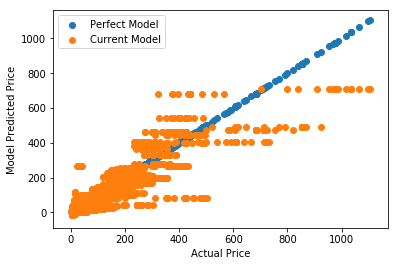

In [8]:
plt.scatter(y, y, label='Perfect Model')
plt.scatter(y, model.predict(X), label='Current Model')
plt.xlabel('Actual Price')
plt.ylabel('Model Predicted Price')
plt.legend()

# Comment: 
Pretty good initial results!

## Thoughts:

* There's also a lot of categorical variables we could take advantage of!

In [7]:
df.head(2)

,ages,list_price,num_reviews,piece_count,play_star_rating,prod_desc,prod_id,prod_long_desc,review_difficulty,set_name,star_rating,theme_name,val_star_rating,country
0,6-12,29.99,2.0,277.0,4.0,Catapult into action and take back the eggs fr...,75823.0,Use the staircase catapult to launch Red into ...,Average,Bird Island Egg Heist,4.5,Angry Birds™,4.0,US
1,6-12,19.99,2.0,168.0,4.0,Launch a flying attack and rescue the eggs fro...,75822.0,Pilot Pig has taken off from Bird Island with ...,Easy,Piggy Plane Attack,5.0,Angry Birds™,4.0,US


In [9]:
#Redefine the problem
y_feat = 'list_price'
x_feats = [feat for feat in df.columns if df[feat].dtype in [np.int64, np.float64] and feat != y_feat]
x_feats += ['ages', 'review_difficulty', 'theme_name', 'country']


y = df[y_feat]
X = df[x_feats]
X = pd.get_dummies(X)
print(X.columns)
X.head()

Index(['num_reviews', 'piece_count', 'play_star_rating', 'prod_id',
       'star_rating', 'val_star_rating', 'ages_10+', 'ages_10-14',
       'ages_10-16', 'ages_10-21',
       ...
       'country_GB', 'country_IE', 'country_IT', 'country_LU', 'country_NL',
       'country_NO', 'country_NZ', 'country_PL', 'country_PT', 'country_US'],
      dtype='object', length=105)


,num_reviews,piece_count,play_star_rating,prod_id,star_rating,val_star_rating,ages_10+,ages_10-14,ages_10-16,ages_10-21,...,country_GB,country_IE,country_IT,country_LU,country_NL,country_NO,country_NZ,country_PL,country_PT,country_US
0,2.0,277.0,4.0,75823.0,4.5,4.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2.0,168.0,4.0,75822.0,5.0,4.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,11.0,74.0,4.3,75821.0,4.3,4.1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,23.0,1032.0,3.6,21030.0,4.6,4.3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,14.0,744.0,3.2,21035.0,4.6,4.1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [10]:
#Second Models and Evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y)
models = [LinearRegression(), Lasso(), Ridge()]
names = ['OLS', 'Lasso', 'Ridge']
for model, name in list(zip(models, names)):
    model.fit(X_train, y_train)
    y_hat_train = model.predict(X_train)
    y_hat_test = model.predict(X_test) 
    print('Model Stats for: {}'.format(name))
    print('Train R^2:', model.score(X_train, y_train))
    print('Test R^2:', model.score(X_test, y_test))
    print('Training MSE: {}'.format(mean_squared_error(y_train, y_hat_train)))
    print('Testing MSE: {}'.format(mean_squared_error(y_test, y_hat_test)))
    print('\n')

Model Stats for: OLS
Train R^2: 0.866543126949
Test R^2: 0.857470340786
Training MSE: 1134.1645116680156
Testing MSE: 1189.1024748106813


Model Stats for: Lasso
Train R^2: 0.823739999707
Test R^2: 0.808329327079
Training MSE: 1497.920883265067
Testing MSE: 1599.0782043294657


Model Stats for: Ridge
Train R^2: 0.866285093879
Test R^2: 0.85703689049
Training MSE: 1136.357369508998
Testing MSE: 1192.7186822932895




# Comments: 
Slight performance gains.

# Exploratory Data Analysis

Let's do some EDA in an attempt to feature engineer.

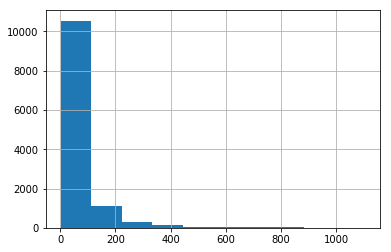

In [16]:
df.list_price.hist()

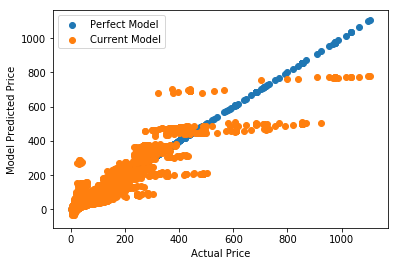

In [18]:
plt.scatter(y, y, label='Perfect Model')
plt.scatter(y, model.predict(X), label='Current Model')
plt.xlabel('Actual Price')
plt.ylabel('Model Predicted Price')
plt.legend()

[[ 1.          0.86962993]
 [ 0.86962993  1.        ]]


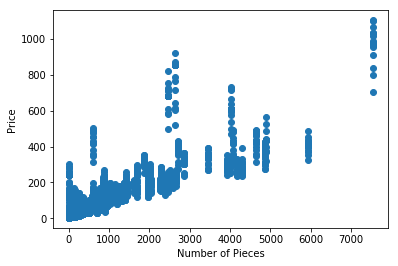

In [10]:
print(np.corrcoef(df.piece_count, df.list_price))
plt.scatter(df.piece_count, df.list_price)
plt.xlabel('Number of Pieces')
plt.ylabel('Price')

It seems like piece count is a good indicator of price!
Let's create some snazzy features representing the distribution of price for various piece count bins.

In [15]:
n_bins = 10
#Create equal sized bin ranges
piece_bins = np.linspace(start=df.piece_count.min(), stop=df.piece_count.max(), num=n_bins)
def binning(piece_count, piece_bins):
    for n, upper_thresh in enumerate(piece_bins[1:]):
        if piece_count <= upper_thresh:
            return n
df['piece_bin'] = df.piece_count.map(lambda x: binning(x, piece_bins))
df.piece_bin.value_counts()

0    10483
1      998
2      379
4      147
3      107
5      105
7       21
8       21
Name: piece_bin, dtype: int64

In [17]:
piece_bin_price_aggs = df.groupby('piece_bin').list_price.agg(['mean', 'std', 'min', 'max'])
piece_bin_price_aggs.head()

,mean,std,min,max
piece_bin,,,,
0,39.505596,34.102509,2.2724,503.9520
1,129.723508,38.712212,36.0000,269.7929
2,241.120584,116.392354,116.9922,821.0898
3,380.763278,221.779144,167.8800,922.9929
4,368.369963,114.874403,233.9922,731.9390


# Create New Features From These

In [19]:
for col in piece_bin_price_aggs.columns:
    temp_dict = dict(zip(piece_bin_price_aggs.index, piece_bin_price_aggs[col]))
    df['piece_bin_price_{}'.format(col)] = df.piece_bin.map(temp_dict)
df.head()

,ages,list_price,num_reviews,piece_count,play_star_rating,prod_desc,prod_id,prod_long_desc,review_difficulty,set_name,star_rating,theme_name,val_star_rating,country,piece_bin,piece_bin_price_mean,piece_bin_price_std,piece_bin_price_min,piece_bin_price_max
0,6-12,29.99,2.0,277.0,4.0,Catapult into action and take back the eggs fr...,75823.0,Use the staircase catapult to launch Red into ...,Average,Bird Island Egg Heist,4.5,Angry Birds™,4.0,US,0,39.505596,34.102509,2.2724,503.9520
1,6-12,19.99,2.0,168.0,4.0,Launch a flying attack and rescue the eggs fro...,75822.0,Pilot Pig has taken off from Bird Island with ...,Easy,Piggy Plane Attack,5.0,Angry Birds™,4.0,US,0,39.505596,34.102509,2.2724,503.9520
2,6-12,12.99,11.0,74.0,4.3,Chase the piggy with lightning-fast Chuck and ...,75821.0,Pitch speedy bird Chuck against the Piggy Car....,Easy,Piggy Car Escape,4.3,Angry Birds™,4.1,US,0,39.505596,34.102509,2.2724,503.9520
3,12+,99.99,23.0,1032.0,3.6,Explore the architecture of the United States ...,21030.0,Discover the architectural secrets of the icon...,Average,United States Capitol Building,4.6,Architecture,4.3,US,1,129.723508,38.712212,36.0000,269.7929
4,12+,79.99,14.0,744.0,3.2,Recreate the Solomon R. Guggenheim Museum® wit...,21035.0,Discover the architectural secrets of Frank Ll...,Challenging,Solomon R. Guggenheim Museum®,4.6,Architecture,4.1,US,0,39.505596,34.102509,2.2724,503.9520


In [20]:
#Redefine the problem
y_feat = 'list_price'
x_feats = [feat for feat in df.columns if df[feat].dtype in [np.int64, np.float64] and feat != y_feat]
x_feats += ['ages', 'review_difficulty', 'theme_name', 'country']


y = df[y_feat]
X = df[x_feats]
X = pd.get_dummies(X)
print(X.columns)
X.head()

Index(['num_reviews', 'piece_count', 'play_star_rating', 'prod_id',
       'star_rating', 'val_star_rating', 'piece_bin', 'piece_bin_price_mean',
       'piece_bin_price_std', 'piece_bin_price_min',
       ...
       'country_GB', 'country_IE', 'country_IT', 'country_LU', 'country_NL',
       'country_NO', 'country_NZ', 'country_PL', 'country_PT', 'country_US'],
      dtype='object', length=108)


,num_reviews,piece_count,play_star_rating,prod_id,star_rating,val_star_rating,piece_bin,piece_bin_price_mean,piece_bin_price_std,piece_bin_price_min,...,country_GB,country_IE,country_IT,country_LU,country_NL,country_NO,country_NZ,country_PL,country_PT,country_US
0,2.0,277.0,4.0,75823.0,4.5,4.0,0,39.505596,34.102509,2.2724,...,0,0,0,0,0,0,0,0,0,1
1,2.0,168.0,4.0,75822.0,5.0,4.0,0,39.505596,34.102509,2.2724,...,0,0,0,0,0,0,0,0,0,1
2,11.0,74.0,4.3,75821.0,4.3,4.1,0,39.505596,34.102509,2.2724,...,0,0,0,0,0,0,0,0,0,1
3,23.0,1032.0,3.6,21030.0,4.6,4.3,1,129.723508,38.712212,36.0000,...,0,0,0,0,0,0,0,0,0,1
4,14.0,744.0,3.2,21035.0,4.6,4.1,0,39.505596,34.102509,2.2724,...,0,0,0,0,0,0,0,0,0,1


In [22]:
# More intelligently fill null values:
for col in X.columns:
    avg = X[col].mean()
    X[col] = X[col].fillna(value=avg)

In [23]:
#Third Models and Evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y)
models = [LinearRegression(), Lasso(), Ridge()]
names = ['OLS', 'Lasso', 'Ridge']
for model, name in list(zip(models, names)):
    model.fit(X_train, y_train)
    y_hat_train = model.predict(X_train)
    y_hat_test = model.predict(X_test) 
    print('Model Stats for: {}'.format(name))
    print('Train R^2:', model.score(X_train, y_train))
    print('Test R^2:', model.score(X_test, y_test))
    print('Training MSE: {}'.format(mean_squared_error(y_train, y_hat_train)))
    print('Testing MSE: {}'.format(mean_squared_error(y_test, y_hat_test)))
    print('\n')

Model Stats for: OLS
Train R^2: 0.899760558791
Test R^2: 0.882066889336
Training MSE: 876.9936814181191
Testing MSE: 894.4843659052663


Model Stats for: Lasso
Train R^2: 0.853176839052
Test R^2: 0.837953336395
Training MSE: 1284.5540925202167
Testing MSE: 1229.0713466754896


Model Stats for: Ridge
Train R^2: 0.899569833784
Test R^2: 0.882425242183
Training MSE: 878.6623322406393
Testing MSE: 891.7663758705215




In [30]:
#Using Cross Validation
def run_cross_validation_model(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    model.fit(X_train, y_train)
    y_hat_train = model.predict(X_train)
    y_hat_test = model.predict(X_test) 
    print('Model Stats for: {}'.format(str(model)[:5]))
    print('Train R^2:', model.score(X_train, y_train))
    print('Test R^2:', model.score(X_test, y_test))
    print('Training MSE: {}'.format(mean_squared_error(y_train, y_hat_train)))
    print('Testing MSE: {}'.format(mean_squared_error(y_test, y_hat_test)))
    print('Model details:', model)
    print('Cross Validation Optimal Alpha Value for Regularization', model.alpha_)
    print('\n')    


for model in [LassoCV(), RidgeCV()]:
    run_cross_validation_model(model, X, y)

Model Stats for: Lasso
Train R^2: 0.797512310148
Test R^2: 0.771619890076
Training MSE: 1651.2580581925658
Testing MSE: 2140.6254425457464
Model details: LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)
Cross Validation Optimal Alpha Value for Regularization 5680.82427936


Model Stats for: Ridge
Train R^2: -7.63718459727
Test R^2: -11.5796180547
Training MSE: 75241.09122943768
Testing MSE: 96923.91197580822
Model details: RidgeCV(alphas=(0.1, 1.0, 10.0), cv=None, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False)
Cross Validation Optimal Alpha Value for Regularization 0.1




# Polynomial Regression

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import seaborn as sns

In [ ]:
def plot_polynomial_reg(model, X, y, degree_min=2, degree_max=7):
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    degrees = []
    train_errs = []
    test_errs = []
    for degree in range(degree_min,degree_max+1):
        model = make_pipeline(PolynomialFeatures(degree, interaction_only=False), model)
        #Could replace Ridge() above with a more complicated cross validation method to improve tuning
        #using a cross validation method will substantially increase runtime
        model.fit(X_train,y_train)
        #Get r^2 values for testing predictions and training predictions
        test_score = model.score(X_test,y_test)
        test_errs.append(test_score)
        
        train_score = model.score(X_train,y_train)
        train_errs.append(train_score)
        
        degrees.append(degree)
    #Create Plot
    plt.scatter(degrees, train_errs, label='Train R^2')
    plt.scatter(degrees, test_errs, label='Test R^2')
    plt.title('Train and Test Accuracy vs Model Complexity')
    plt.xlabel('Maximum Degree of Polynomial Regression')
    plt.legend()

for model in [Ridge(), Lasso()]:
    plot_polynomial_reg(Ridge(), X, y)

C:\Users\matt\Anaconda3wenv\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.1595018261589084e-21
  ' condition number: {}'.format(rcond), RuntimeWarning)


# Final Pipeline

Choose current best model.